<a href="https://colab.research.google.com/github/Rudrajit12/SupervisedML_Regression_Capstone_Project/blob/main/Yes_Bank_Stock_Closing_Price_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement:**

### Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. 

### This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month.

### **The main objective is to predict the stock’s closing price of the month.**

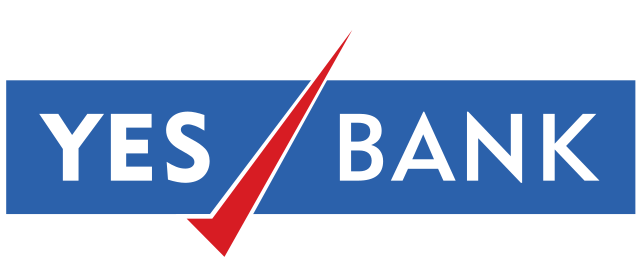

#### Yes Bank is an Indian bank headquartered in Mumbai, India and was founded by Rana Kapoor and Ashok Kapur in 2004.

#### It offers wide range of differentiated products for corporate and retail customers through retail banking and asset management services. On 5 March 2020, in an attempt to avoid the collapse of the bank, which had an excessive amount of bad loans, the Reserve Bank of India (RBI) took control of it. RBI later reconstructed the board and named Prashant Kumar, former chief financial officer and deputy managing director of State Bank of India, as MD & CEO of Yes Bank, along with Sunil Mehta, former non-executive chairman of Punjab National Bank, as Yes Bank’s non-executive chairman.

#### The bank’s management under the new leadership of Kumar, immediately repositioned itself and dealt with all internal and market related challenges to restore customer and depositor confidence. Under the coordinated efforts of the new board and management, Mehta assured shareholders of speedy recovery, even as the Reserve Bank of India (RBI), State Bank of India (SBI), HDFC Bank, ICICI Bank, Axis Bank and other banks lent it support through a historic Yes Bank Reconstruction Scheme 2020.

#### In July 2020, Yes Bank Ltd closed their follow-on public offer (FPO) with 95% subscription, driven by institutional investors.

#### As of 28 July 2020, Yes Bank is an associate of State Bank of India which has a 30% stake in the company.

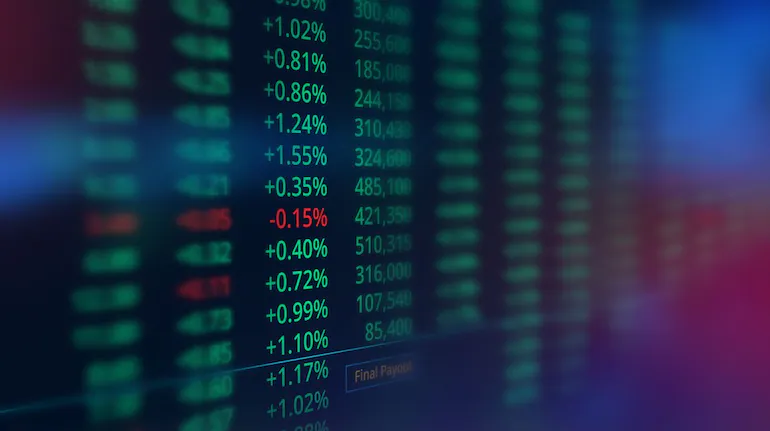

### **What is a Stock Market?**

#### A stock market, equity market, or share market is the aggregation of buyers and sellers of stocks (also called shares), which represent ownership claims on businesses; these may include securities listed on a public stock exchange, as well as stock that is only traded privately, such as shares of private companies which are sold to investors through equity crowdfunding platforms. Investment is usually made with an investment strategy in mind.

#### Stocks can be categorized by the country where the company is domiciled. For example, Nestlé and Novartis are domiciled in Switzerland and traded on the SIX Swiss Exchange, so they may be considered as part of the Swiss stock market, although the stocks may also be traded on exchanges in other countries, for example, as American depositary receipts (ADRs) on U.S. stock markets.

### **What is a Stock?**

#### A stock is a security that represents an ownership share in a company. When you purchase a company's stock, you're purchasing a small piece of that company, called a share.

#### Investors purchase stocks in companies they think will go up in value. If that happens, the company's stock increases in value as well. The stock can then be sold for a profit.

#### For companies, issuing stock is a way to raise money to grow and invest in their business. For investors, stocks are a way to grow their money and outpace inflation over time.

#### When you own stock in a company, you are called a shareholder because you share in the company's profits.

## **1. Import the libraries and the dataset to understand the variables present**

In [16]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = [15,9]
sns.set(rc={'figure.figsize':(15,9)})

In [2]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# Loading the data
yes_df = pd.read_csv('/content/drive/MyDrive/Yes Bank Stock Closing Price Prediction - Rudrajit Bhattacharyya/data_YesBank_StockPrices.csv')
yes_df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [4]:
# last 5 rows of the data
yes_df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [5]:
# number of records in the data
len(yes_df)

185

In [6]:
# shape of dataset
yes_df.shape

(185, 5)

In [7]:
# columns in the dataset
yes_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

* There are a total of 185 rows and 5 columns in the dataset.
* It contains the columns Date, Open, High, Low, Close.

In [8]:
# check data types of the features
yes_df.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

## **Data Summary:**

* **Date**: Contains the month and year information and is of object datatype. We need to convert it into a datetime object before diving into EDA.

* **Open**: Contains information about the opening price on a particular month and year. Opening price is the price at which a security first trades upon the opening of an exchange on a trading day. For e.g, NSE markets open at 09:15 hrs IST. It is a float variable in our dataset.

* **High**: High is the highest price at which a stock traded during the course of the trading day. In our case it is the highest price in a month that the stock traded at. It is also a float variable in our dataset.

* **Low**: Low is the lowest price at which a stock traded during the course of the trading day. In our case it is the lowest price in a month that the stock traded at. This is also a float variable in our dataset.

* **Close**: Contains information about the closing price on a particular month and year. Closing price is the price at which a security last trades before the market officially closes for trading. For e.g, NSE markets close at 15:30 hrs IST. It is our dependent variable here and of float datatype.

## **2. Information/Description of the Dataset:**

In [9]:
# check null values in the dataset
yes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [10]:
# description of the dataset
yes_df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


## **3. Check for duplicates and missing values in the dataset:**

#### When it comes to data, there are many different sorts of quality issues, which is why data cleaning is one of the most time-consuming aspects of data analysis.

#### Formatting issues (e.g., rows and columns merged), missing data, duplicated rows, spelling discrepancies, and so on could all be present. These difficulties could make data analysis difficult, resulting in inaccuracies or inappropriate results. As a result, these issues must be addressed before data can be analyzed. Data cleaning is frequently done in an unplanned, difficult-to-define manner.

#### **The date column needs to be converted into a datetime object and we will extract the date in the format YYYY-MM-DD.**

In [11]:
# convert date into datetime object
from datetime import datetime
yes_df['Date'] = yes_df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [12]:
# check the dataframe
yes_df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [13]:
# check for duplicates in the data
yes_df.duplicated().sum()

0

In [14]:
# check for null values
yes_df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

#### There are no duplicate or null values present in the dataset. It is an almost cleaned dataset and we're ready to move to EDA.

## **Exploratory Data Analysis:**

### **What's the highest and lowest closing prices of the stock?**

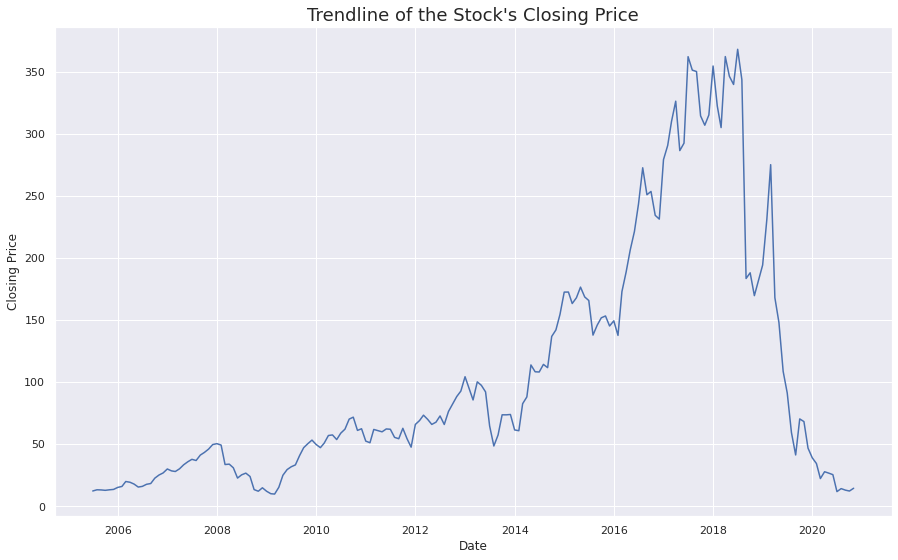

In [33]:
# trend line of stock's closing price
plt.plot(yes_df['Date'], yes_df['Close'])
plt.title("Trendline of the Stock's Closing Price", fontsize = 18)
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

* The trendline shows a lot of fluctuations happening in the stock's closing price but it grew a lot from 2016 to 2018 to the investor's delight.

* After 2018, there is a drastic fall in the stock price and it is very natural due to the Rana Kapoor fraud case.

* We can infer that it was a good stock to buy in the initial years like 2006-2012 and sell it within the period of 2016-2018.

### **What's the highest and lowest opening prices of the stock?**

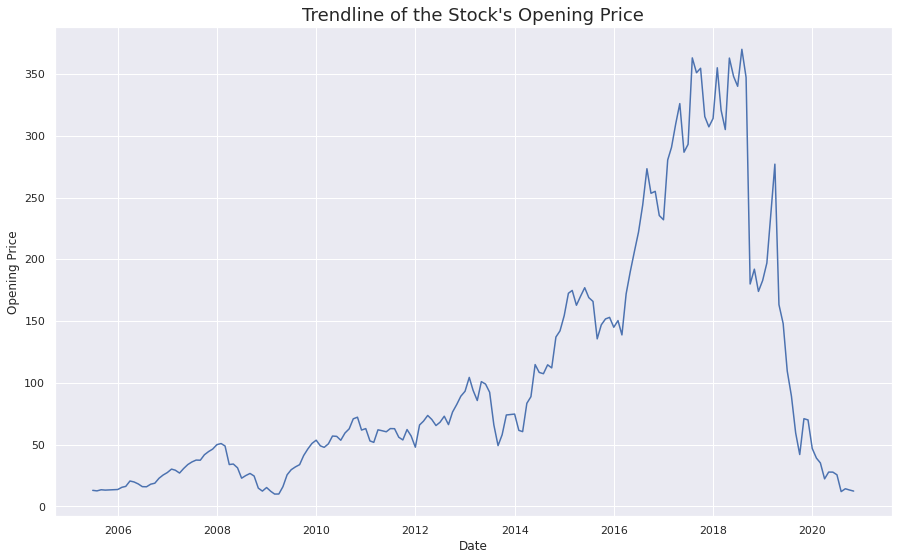

In [34]:
# trend line of stock's opening price
plt.plot(yes_df['Date'], yes_df['Open'])
plt.title("Trendline of the Stock's Opening Price", fontsize = 18)
plt.xlabel("Date")
plt.ylabel("Opening Price")
plt.show()

* The trendline for opening prices shows it is very similar to the stock's closing prices.

* Thus, it means that there wasn't a drastic growth/fall in the stock's closing price as compared to the stock's opening price on any given day. It wasn't a highly volatile stock before the Rana Kapoor Fraud Case in 2018.

### **What's the all time high of the stock and when did it happen?**

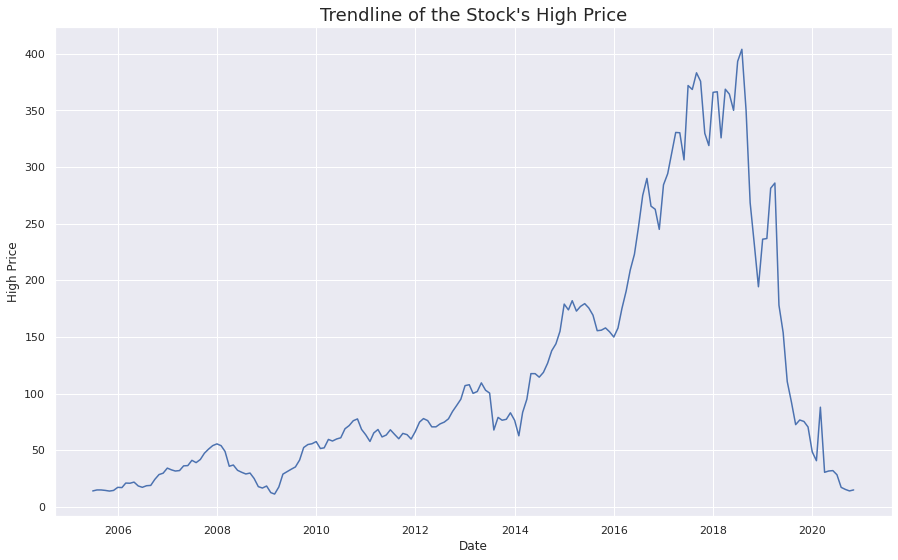

In [35]:
# trend line of stock's highest price
plt.plot(yes_df['Date'], yes_df['High'])
plt.title("Trendline of the Stock's High Price", fontsize = 18)
plt.xlabel("Date")
plt.ylabel("High Price")
plt.show()

* The stock hit an all time high around the period of Aug 2018 (Rs 404). After that it went on to fall drastically every month.

* The stock traded at a good high around the period from start of 2017 to end of 2018. Investors who sold their shares during these periods got the most profits out of the stock.

* All thanks to Rana Kapoor and Co, that the stock prices are back to the point where it began during the year 2005.

### **What's the all time low of the stock and when did that happen?**

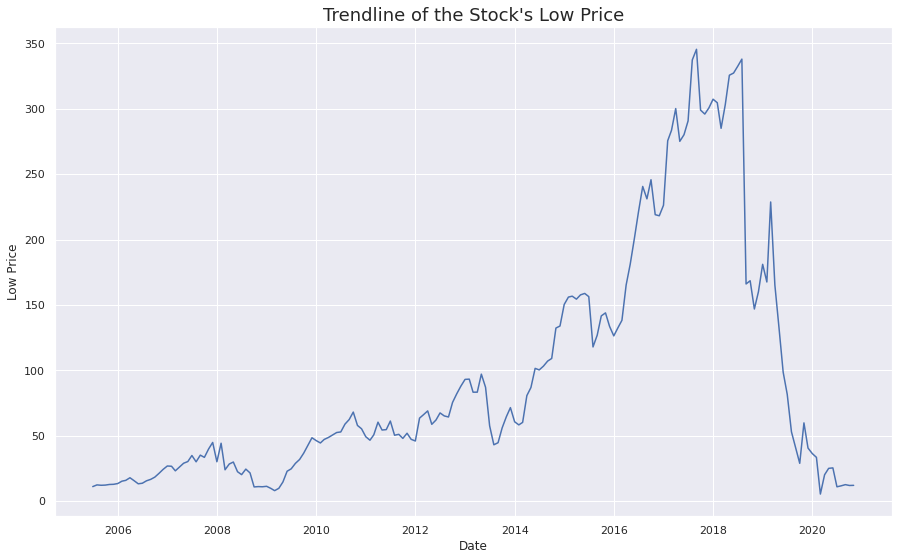

In [36]:
# trend line of stock's lowest price
plt.plot(yes_df['Date'], yes_df['Low'])
plt.title("Trendline of the Stock's Low Price", fontsize = 18)
plt.xlabel("Date")
plt.ylabel("Low Price")
plt.show()

* The stock hit an all time low around the period of Mar 2020 (Rs 5.55). It traded around Rs 10- Rs 30 after that.

* The best period to sell the stock was during 2017-2018 as it traded around the all time high mark in these two years.

### **Comparison of the stock's high and low prices:**

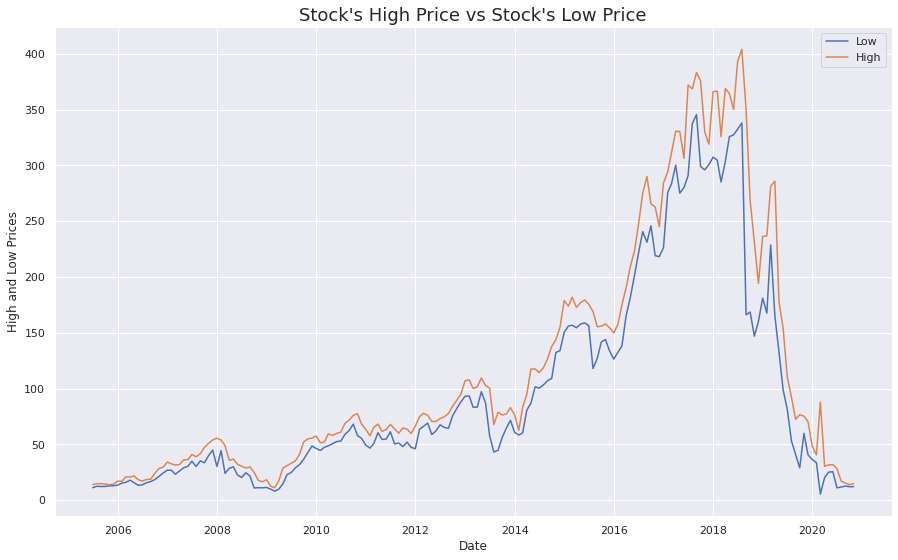

In [37]:
# what's the difference between the high and low prices of the stock
plt.plot(yes_df['Date'], yes_df['Low'], label='Low')
plt.plot(yes_df['Date'], yes_df['High'], label='High')
plt.title("Stock's High Price vs Stock's Low Price", fontsize = 18)
plt.xlabel("Date")
plt.ylabel("High and Low Prices")
plt.legend()
plt.show()

* The above plot depicts the scenario that the stock's high price doesn't have much difference with the stock's low price at any given point of time.

* The price band between the low and high price remained the same throughout our dataset.

### **Comparison of the stock's opening price and closing price:**

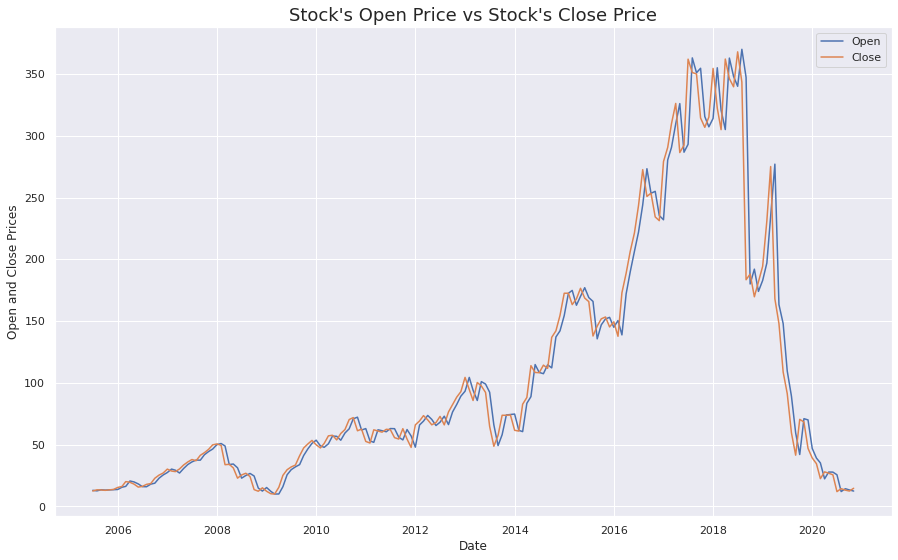

In [60]:
# what's the difference between the open and close prices of the stock
plt.plot(yes_df['Date'], yes_df['Open'], label='Open')
plt.plot(yes_df['Date'], yes_df['Close'], label='Close')
plt.title("Stock's Open Price vs Stock's Close Price", fontsize = 18)
plt.xlabel("Date")
plt.ylabel("Open and Close Prices")
plt.legend()
plt.show()

* There's hardly any difference between the stock's opening price and the closing price on any given day.

* The closing price is above the opening price during the period 2016 to 2018 and then after the Rana Kapoor Saga, the closing price mostly remained below the opening price on any given day.

### **Let us check the distribution of the target variable (closing price):**

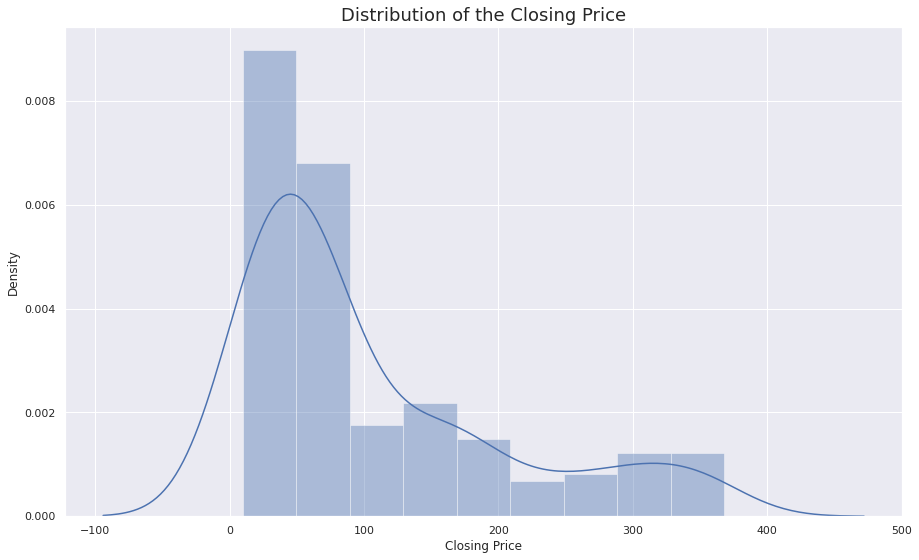

In [38]:
# plot the distribution of the close price
sns.distplot(yes_df['Close'])
plt.title("Distribution of the Closing Price", fontsize = 18)
plt.xlabel("Closing Price")
plt.ylabel("Density")
plt.show()

* We can see from the distribution that it is a right skewed distribution and most of the closing prices lie between the range of 0 to 100.

* We will apply log transformation to the target variable to make the distribution normal.

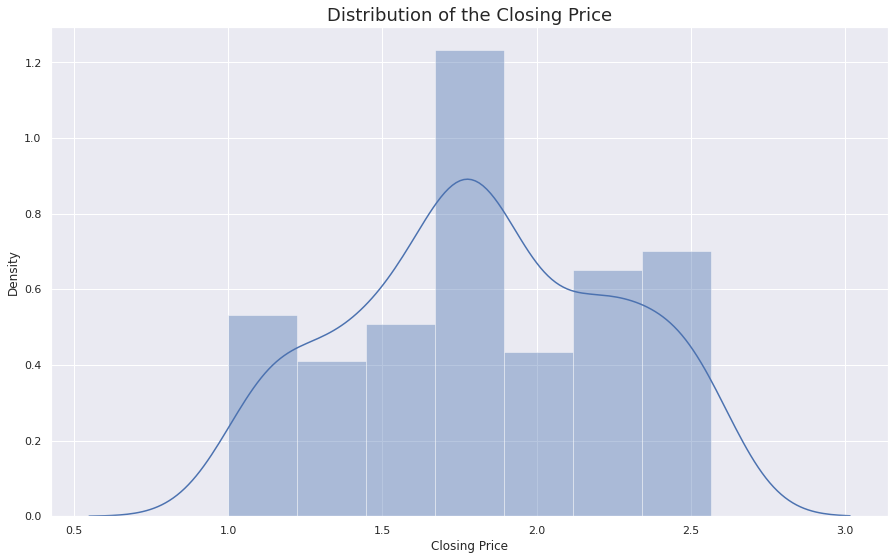

In [39]:
# applying log transformation
sns.distplot(np.log10(yes_df['Close']))
plt.title("Distribution of the Closing Price", fontsize = 18)
plt.xlabel("Closing Price")
plt.ylabel("Density")
plt.show()

* This plot looks more like a normal distribution.

### **Check the outliers in the target variable:**

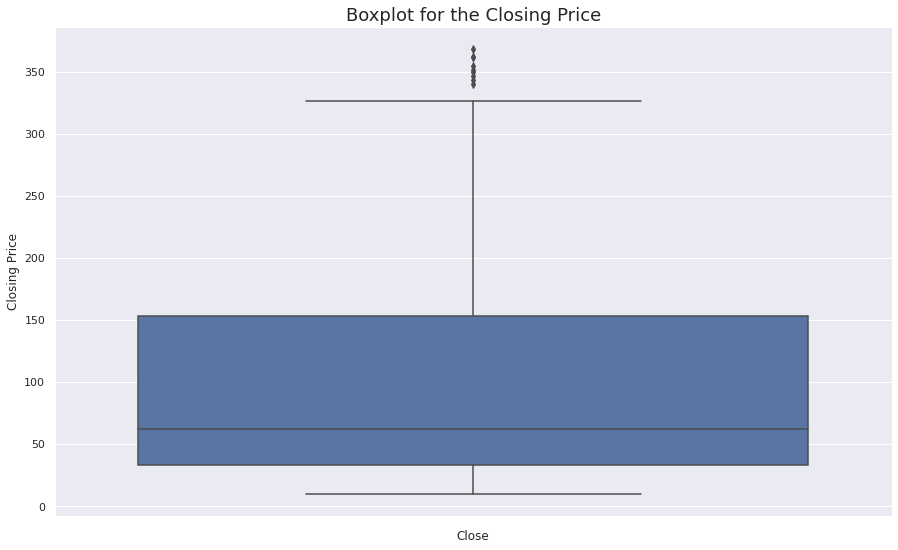

In [41]:
# plot the boxplot for closing price
sns.boxplot(y = yes_df['Close'])
plt.title("Boxplot for the Closing Price", fontsize = 18)
plt.xlabel("Close")
plt.ylabel("Closing Price")
plt.show()

* Though this plot shows that there are few outliers present in the 'Close' variable but we know that the stock reached around that price in real life as per the information we can get from stock trading platforms.

* The price reached an all time high of Rs 404 around August 2018 and stayed around for sometime.

* Thus, we cannot treat any value as outlier and remove them.

### **Let us check the distribution of the independent variables:**

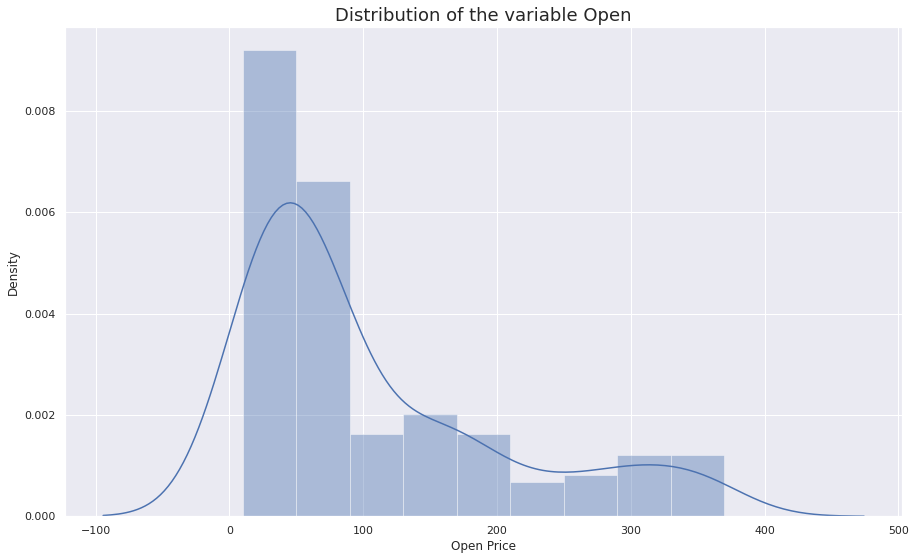

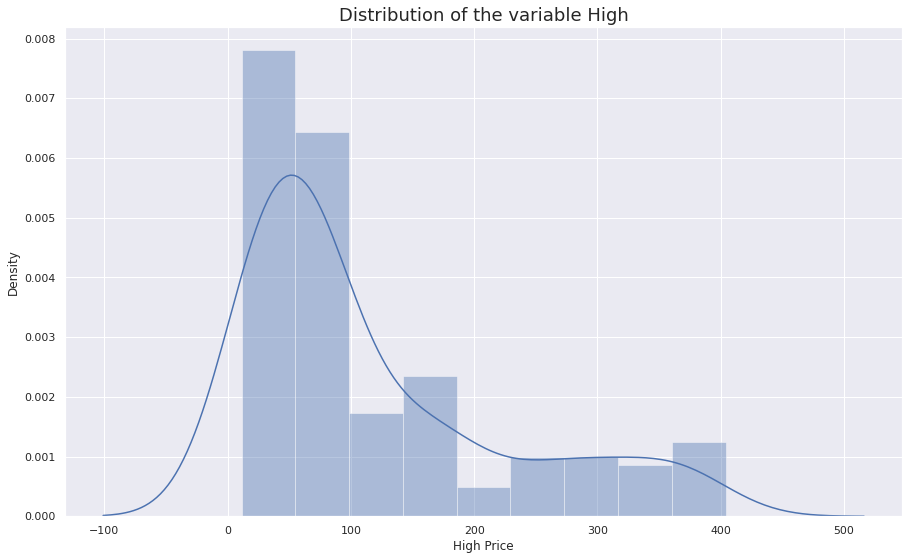

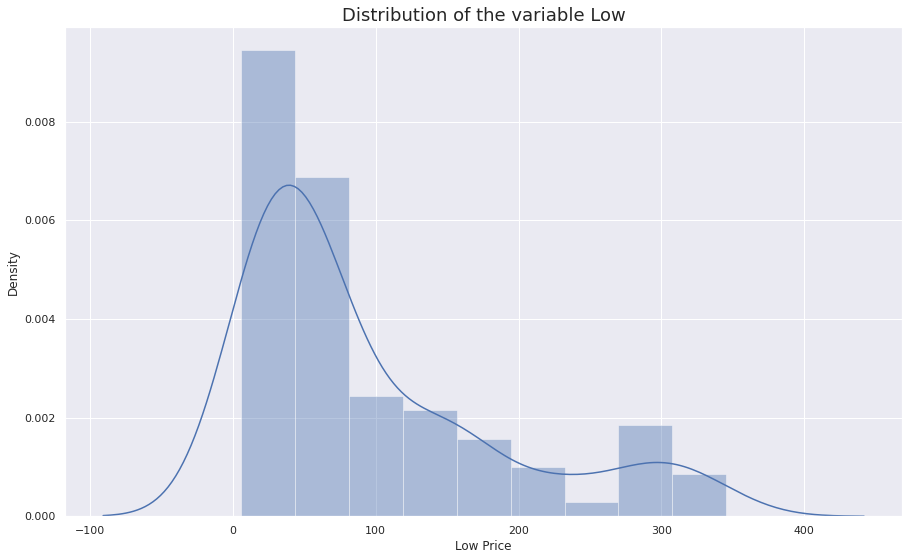

In [56]:
# plot the distribution of the independent variables
for feature in ['Open','High','Low']:
  plt.figure()
  sns.distplot(yes_df[feature])
  plt.title(f"Distribution of the variable {feature}", fontsize = 18)
  plt.xlabel(f"{feature} Price")
  plt.ylabel("Density")

* All the independent variable looks to have a right skewed distribution. We will need to apply log transformation to convert these into normal distributions.

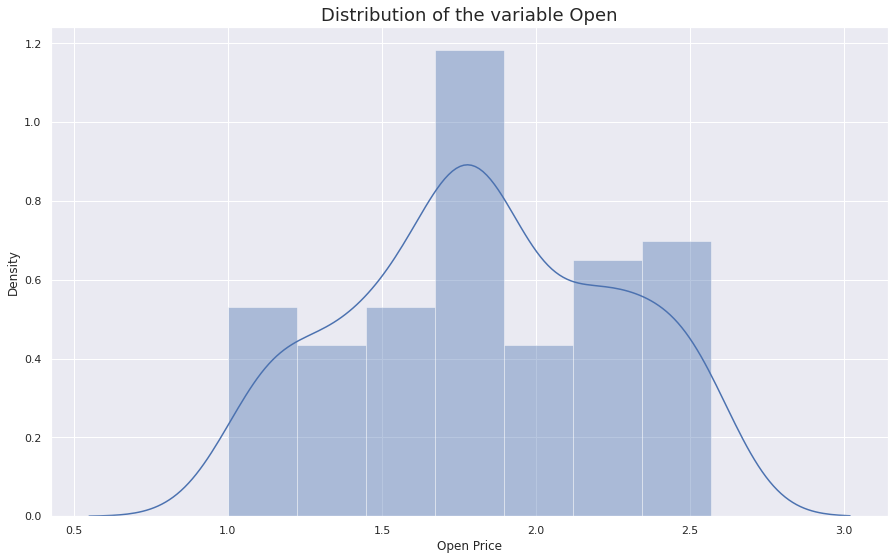

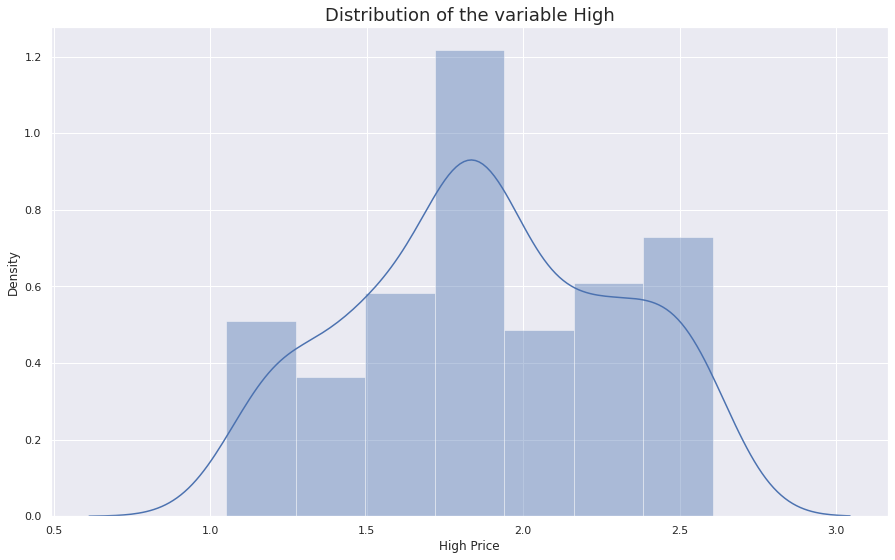

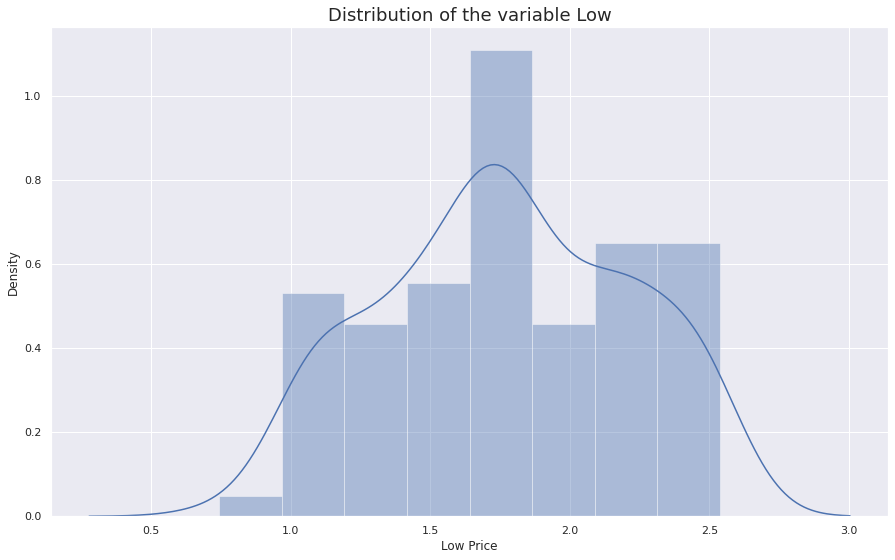

In [57]:
# applying log transformation on the independent variables
for feature in ['Open','High','Low']:
  plt.figure()
  sns.distplot(np.log10(yes_df[feature]))
  plt.title(f"Distribution of the variable {feature}", fontsize = 18)
  plt.xlabel(f"{feature} Price")
  plt.ylabel("Density")

* All of the independent variable distributions looks like a normal distribution now.

### **Let us check the outliers of the independent variables:**

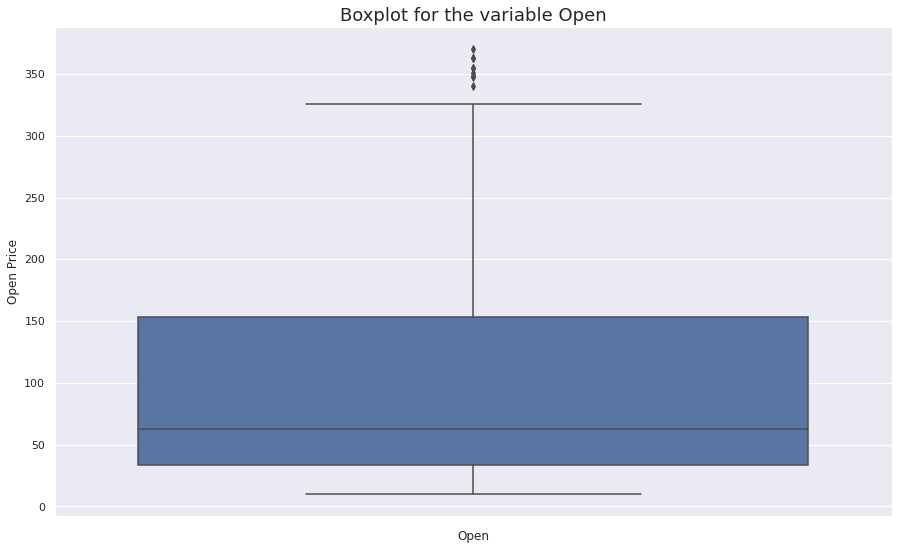

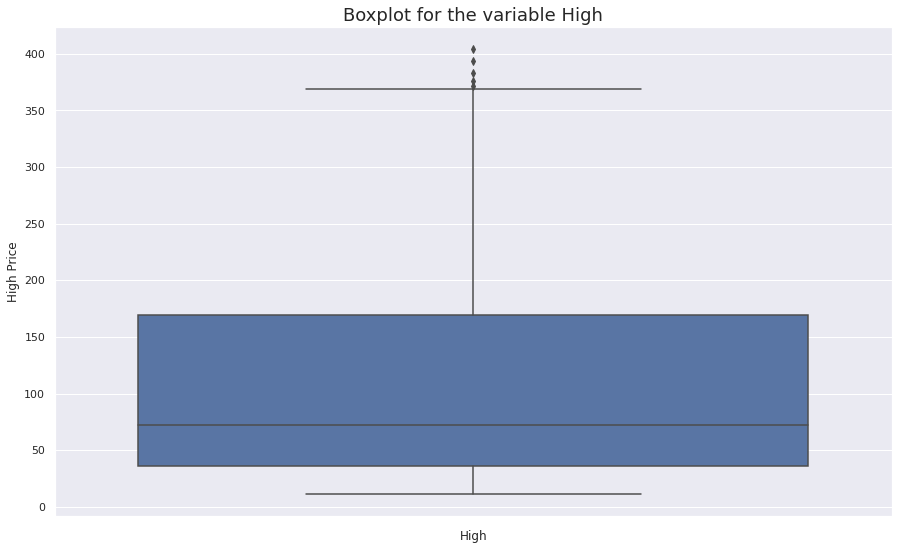

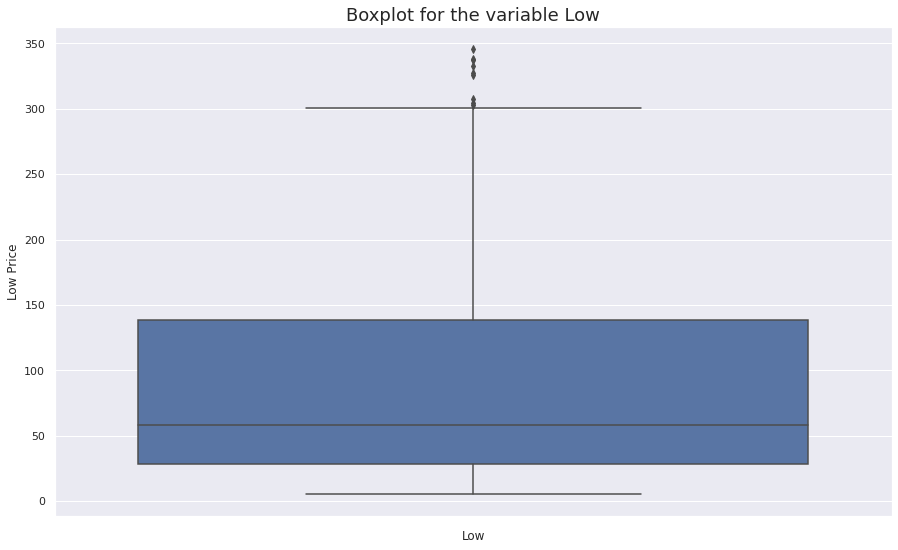

In [59]:
# plot boxplots for each indepedent variable
for feature in ['Open','High','Low']:
  sns.boxplot(y = yes_df[feature])
  plt.title(f"Boxplot for the variable {feature}", fontsize = 18)
  plt.xlabel(f"{feature}")
  plt.ylabel(f"{feature} Price")
  plt.show()

* As we have already seen before that the outliers shown by the boxplots are not outliers in real life.

* As per the information we get from stock trading platforms, these range of prices has occurred in real life and hence we cannot treat any of these values as outliers for our modelling.